# RSA

In [5]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_defaults()
sns.set_style("whitegrid") #  {darkgrid, whitegrid, dark, white, ticks}
sns.set_context("talk")

#### Function for loading results

In [6]:
def load_results(results_fn, rep_name):
    results_dir = '../../results/'
    results_path = os.path.join(results_dir,results_fn)
    
    with open(results_path, 'rb') as f:
        data = pickle.load(f)
    
    # Get regression results
    analysis = data['analysis']
    t_x1, p_x1 = [], [] # 2D grid
    t_x2, p_x2 = [], [] # 1D orthogonal
    t_x3, p_x3 = [], [] # same_ctx
    for run in analysis:
        #print(run[0]['rsa'][rep_name].keys())
        t_x1.append([s['rsa'][rep_name]['t_statistic'][1] for s in run])
        t_x2.append([s['rsa'][rep_name]['t_statistic'][2] for s in run])
        t_x3.append([s['rsa'][rep_name]['t_statistic'][3] for s in run])
        p_x1.append([s['rsa'][rep_name]['p_value'][1] for s in run])
        p_x2.append([s['rsa'][rep_name]['p_value'][2] for s in run])
        p_x3.append([s['rsa'][rep_name]['p_value'][3] for s in run])
    t_x1 = np.array(t_x1)
    t_x2 = np.array(t_x2)
    t_x3 = np.array(t_x3)
    p_x1 = np.array(p_x1)
    p_x2 = np.array(p_x2)
    p_x3 = np.array(p_x3)
    
    # Get congruent vs. incongruent accuracy results
    results = data['results']
    cong_accs = []
    incong_accs = []
    for run in results:
        cong_accs.append([s['cong_acc'] for s in run['train_accs']])
        incong_accs.append([s['incong_acc'] for s in run['train_accs']])
    cong_accs = np.mean(cong_accs, axis=0)
    incong_accs = np.mean(incong_accs, axis=0)
    acc_ratios = cong_accs/incong_accs
    return t_x1, t_x2, t_x3, p_x1, p_x2, p_x3, acc_ratios

#### Function for plotting results

In [7]:
def plot_regression(t_x1, t_x2, t_x3, acc_ratios, title, save_fn):
    color = 'tab:blue'
    n_checkpoints = len(acc_ratios)
    fig, ax = plt.subplots(3,1, sharex=True, figsize=(20,18))
    
    # 2D grid distances
    sns.boxplot(ax=ax[0], color=color, data=t_x1)
    sns.stripplot(ax=ax[0], color=color, data=t_x1)
    ax[0].axhline(y=1.96, color='r', linewidth=2)
    ax[0].axhline(y=-1.96, color='r', linewidth=2)
    ax[0].set_title('2D grid')
    ax[0].set_ylabel("T statistic")
    
    # 1D orthogonal
    sns.boxplot(ax=ax[1], color=color, data=t_x2)
    sns.stripplot(ax=ax[1], color=color, data=t_x2)
    ax[1].axhline(y=1.96, color='r', linewidth=2)
    ax[1].axhline(y=-1.96, color='r', linewidth=2)
    ax[1].set_ylabel("T statistic")
    ax[1].set_title('1D orthogonal')
    
    # Same context
    sns.boxplot(ax=ax[2], color=color, data=t_x3)
    sns.stripplot(ax=ax[2], color=color, data=t_x3)
    ax[2].axhline(y=1.96, color='r', linewidth=2)
    ax[2].axhline(y=-1.96, color='r', linewidth=2)
    ax[2].set_yscale('log')
    ax[2].set_ylabel("T statistic")
    ax[2].set_title('Same context')
    ax[2].set_xticklabels([i*analyze_every for i in range(n_checkpoints)])
    ax[2].set_xlabel("Steps")
    
    # Accuracy ratio
#     ax2 = ax.twinx()
#     ax2 = sns.lineplot(data=acc_ratios, err_style="bars", markers=True, dashes=False, palette=['darkblue'])
#     ax.set_title("Warping vs. accuracy")
#     ax2.legend(["Accuracy Ratio"])
#     ax2.set_ylim([-1, 3])
#     ax2.set_ylabel("Ratio (congruent / incongruent)")

    # Save
    if save_fn is not None:
        plt.savefig(save_fn, dpi=300, bbox_inches='tight')
    
    plt.show()

## MLP

In [10]:
results_fn = 'mlp.P'
rep_name = 'hidden'
analyze_every = 50
title = "MLP"
save_fn = '../../figures/mlp_rsa.png'

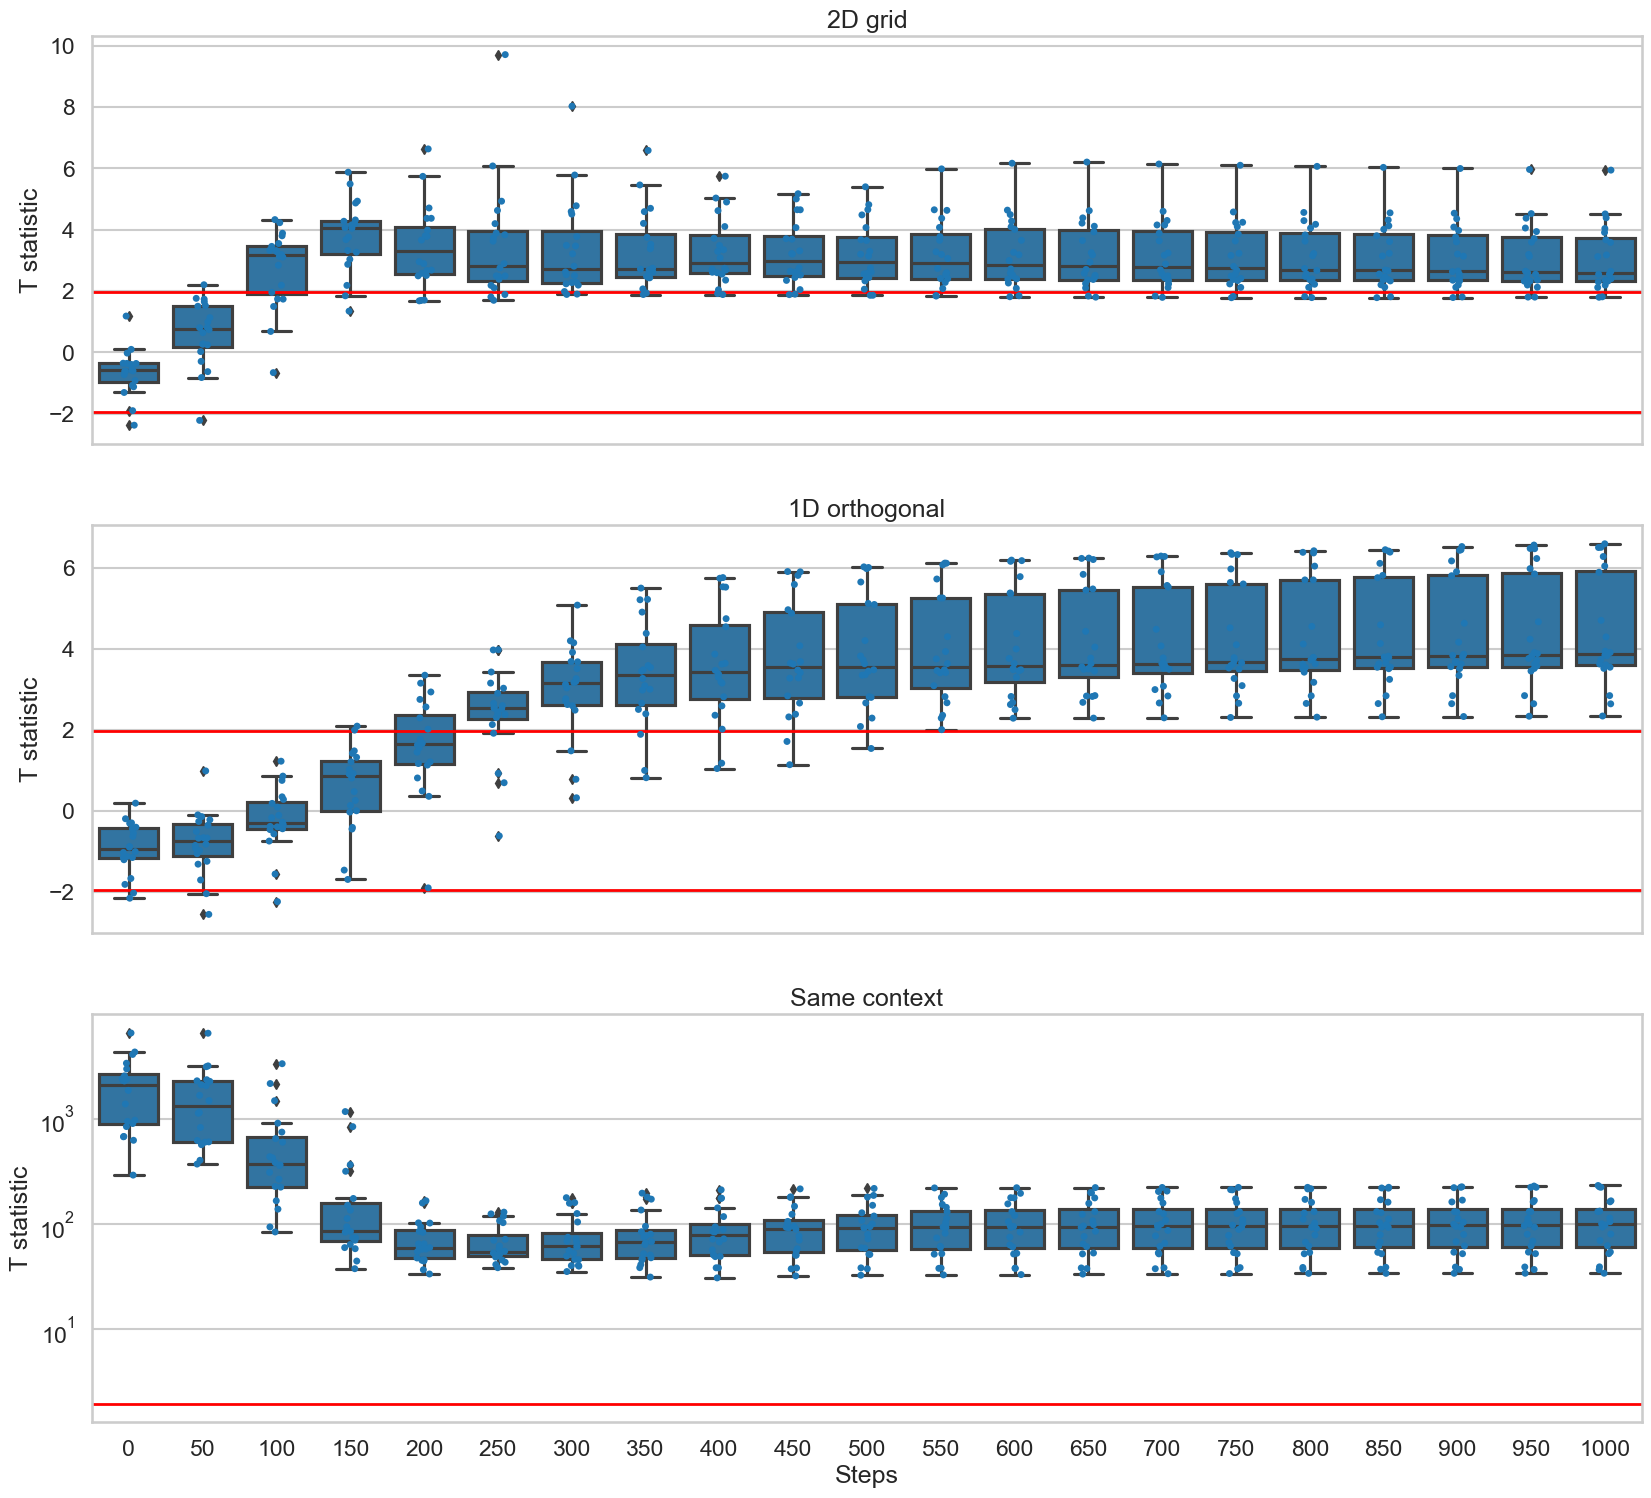

In [11]:
t_x1, t_x2, t_x3, p_x1, p_x2, p_x3, acc_ratios = load_results(results_fn, rep_name)
plot_regression(t_x1, t_x2, t_x3, acc_ratios, title, save_fn)

## RNN

In [12]:
results_fn = 'rnn.P'
rep_name = 'average'
analyze_every = 50
title = "RNN"
save_fn = '../../figures/rnn_rsa.eps'

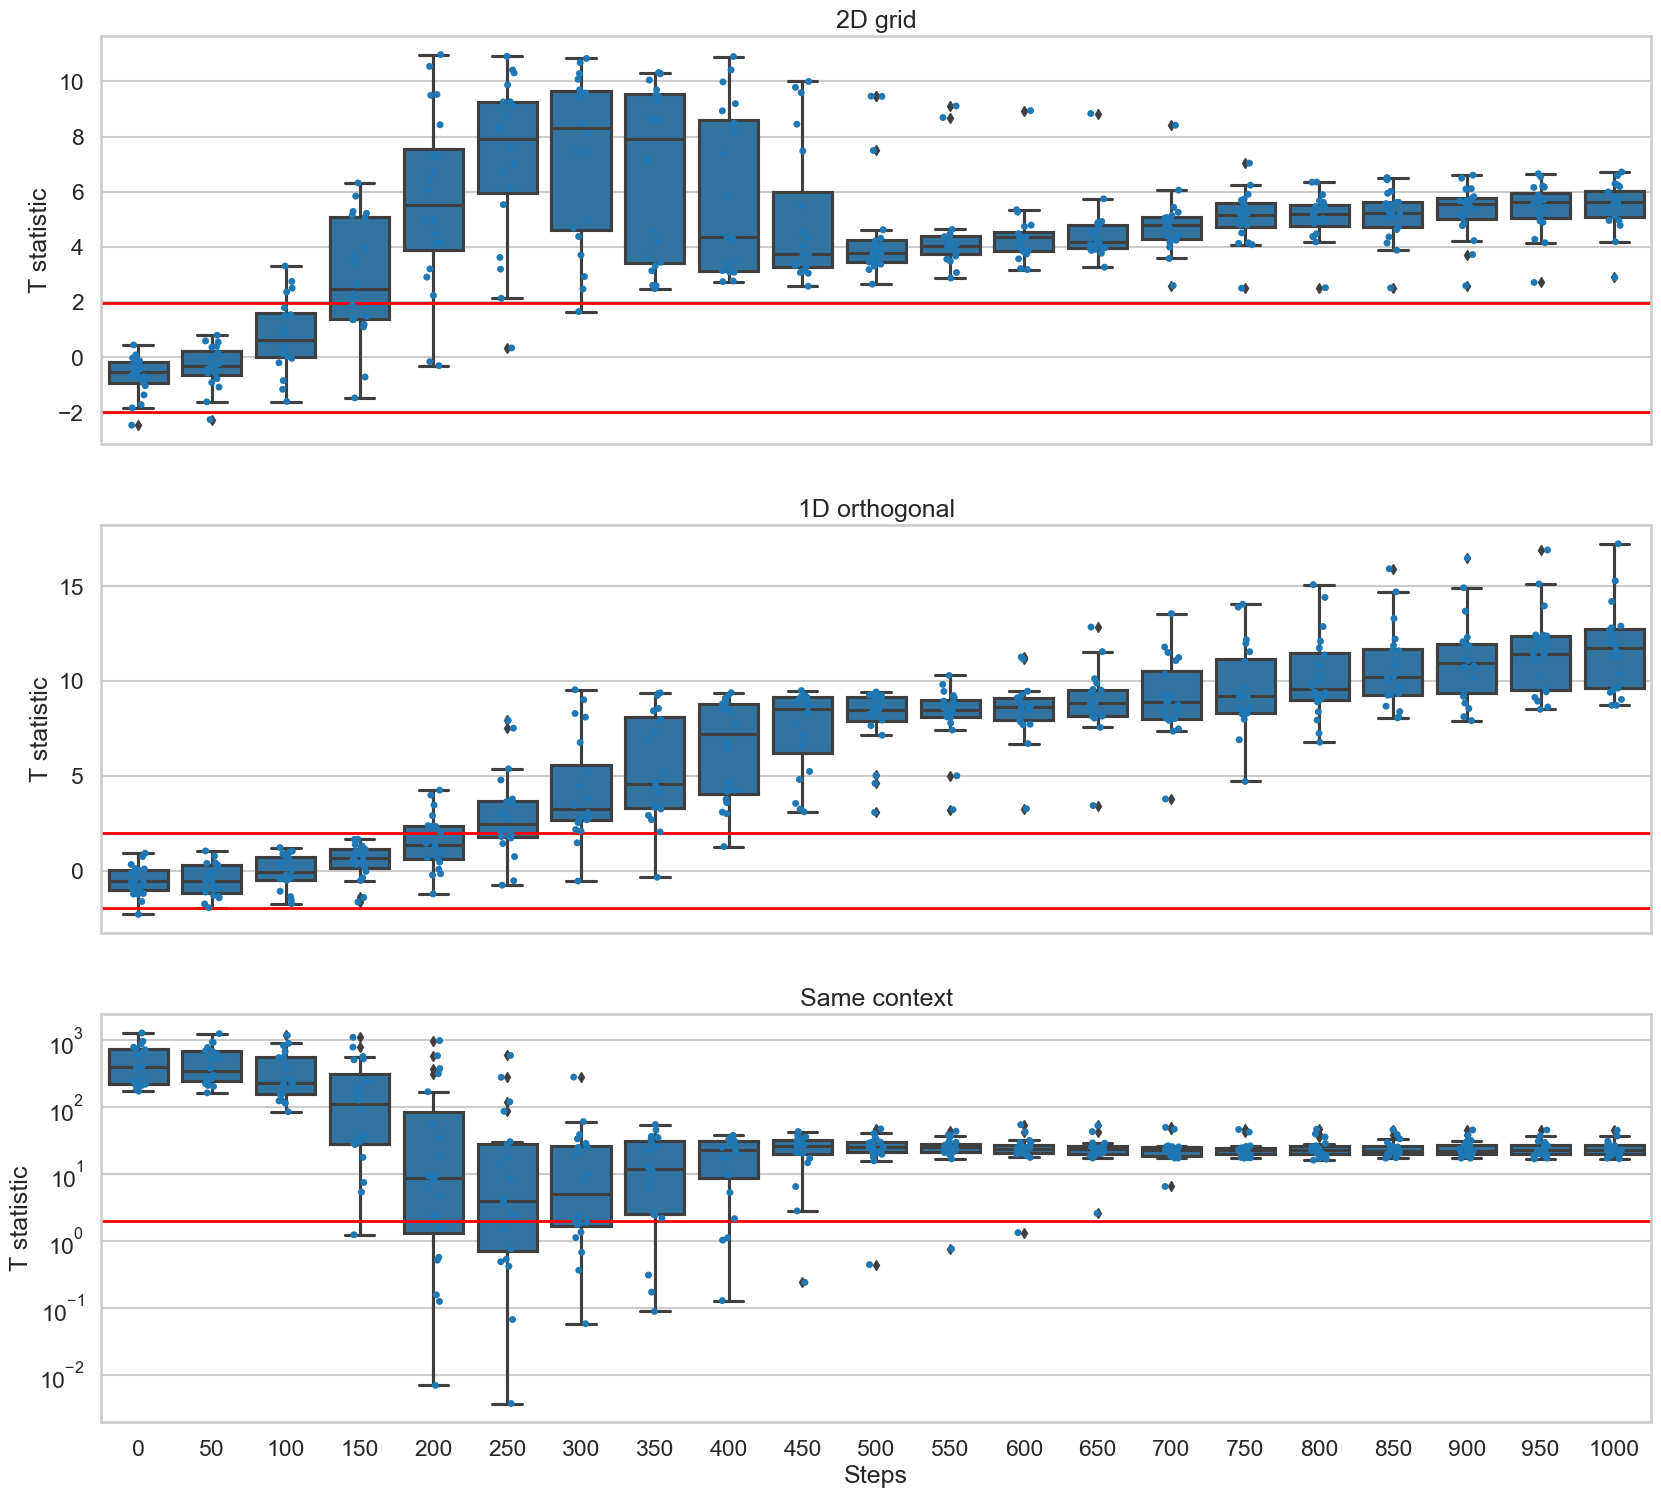

In [13]:
t_x1, t_x2, t_x3, p_x1, p_x2, p_x3, acc_ratios = load_results(results_fn, rep_name)
plot_regression(t_x1, t_x2, t_x3, acc_ratios, title, save_fn)

In [27]:
# Get median t-value and p-value for peak for 2D
t_x1_median = np.median(t_x1, axis=0)
p_x1_median = np.median(p_x1, axis=0)
peak_step_x1 = np.argmax(t_x1_median)
peak_t_x1 = t_x1_median[peak_step_x1]
peak_p_x1 = p_x1_median[peak_step_x1]
print("2D peak:")
print("\tPeak step: ", peak_step_x1*analyze_every)
print("\tPeak t: ", peak_t_x1)
print("\tPeak p: ", peak_p_x1)

# Get median t-value and p-value for peak for 1D
t_x2_median = np.median(t_x2, axis=0)
p_x2_median = np.median(p_x2, axis=0)
peak_step_x2 = np.argmax(t_x2_median)
peak_t_x2 = t_x2_median[peak_step_x2]
peak_p_x2 = p_x2_median[peak_step_x2]
print("1D peak:")
print("\tPeak step: ", peak_step_x2*analyze_every)
print("\tPeak t: ", peak_t_x2)
print("\tPeak p: ", peak_p_x2)

# Get median t-value and p-value for final step for 2D
final_t_x1 = t_x1_median[-1]
final_p_x1 = p_x1_median[-1]
print("2D final:")
print("\tFinal t: ", final_t_x1)
print("\tFinal p : ", final_p_x1)

# Get median t-value and p-value for final step for 1D
final_t_x2 = t_x2_median[-1]
final_p_x2 = p_x2_median[-1]
print("1D final:")
print("\tFinal t: ", final_t_x2)
print("\tFinal p : ", final_p_x2)


2D peak:
	Peak step:  300
	Peak t:  8.307759001575036
	Peak p:  2.0812011262980168e-15
1D peak:
	Peak step:  1000
	Peak t:  11.750056412756518
	Peak p:  5.647746826930292e-28
2D final:
	Final t:  5.6296450309917425
	Final p :  3.053338485367432e-08
1D final:
	Final t:  11.750056412756518
	Final p :  5.647746826930292e-28


300 8.307759001575036


In [ ]:
print(np.)